<a href="https://colab.research.google.com/github/Deepu-19/Coding/blob/main/Play_Store_App_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Play Store Data.csv to Play Store Data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Play Store Data.csv']))
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# Replace "Varies with device" with NaN
df['Size'] = df['Size'].replace('Varies with device', pd.NA)

# Remove 'M' and 'k', but only from strings
df['Size'] = df['Size'].astype(str)

# Convert sizes to float
def convert_size(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1_000  # Convert to KB
    elif 'k' in value:
        return float(value.replace('k', ''))
    else:
        return pd.NA  # Missing or unexpected format

df['Size'] = df['Size'].apply(convert_size)


/tmp/ipython-input-8-1043459455.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index[:10], palette='Set2')


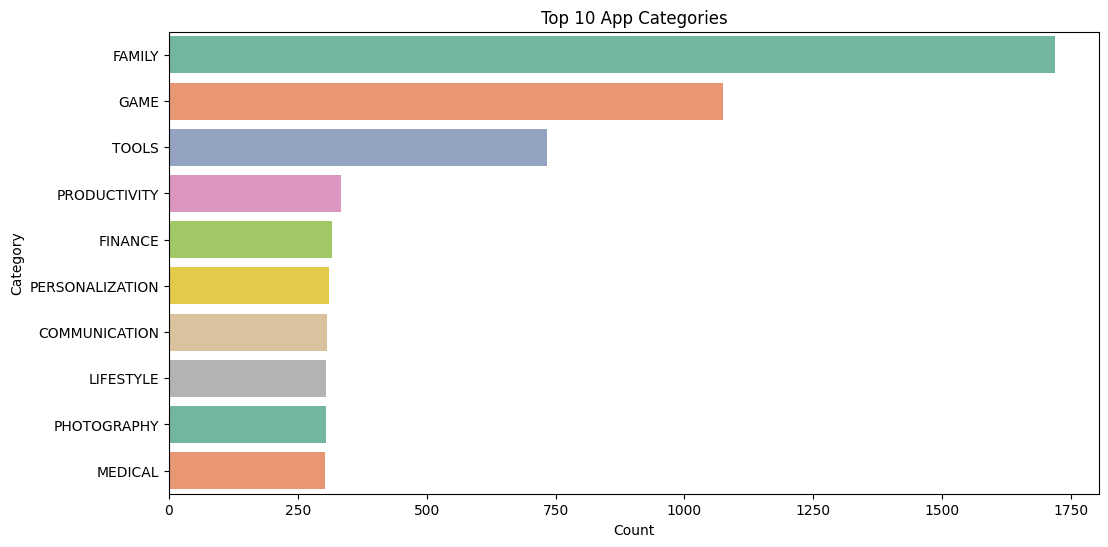

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index[:10], palette='Set2')
plt.title('Top 10 App Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


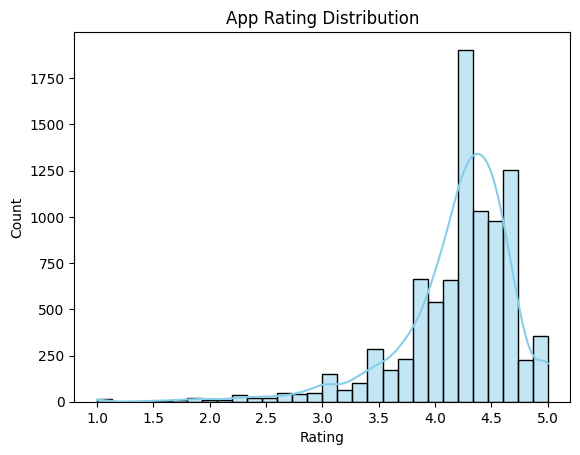

In [9]:
sns.histplot(df['Rating'], bins=30, kde=True, color='skyblue')
plt.title('App Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


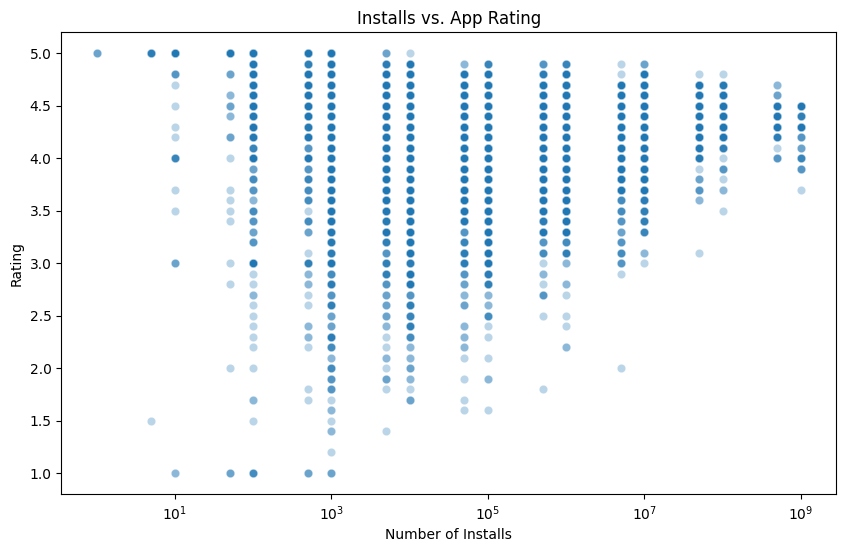

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Installs', y='Rating', alpha=0.3)
plt.title('Installs vs. App Rating')
plt.xlabel('Number of Installs')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()


/tmp/ipython-input-11-1639029842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_rating.values, y=cat_rating.index, palette='coolwarm')


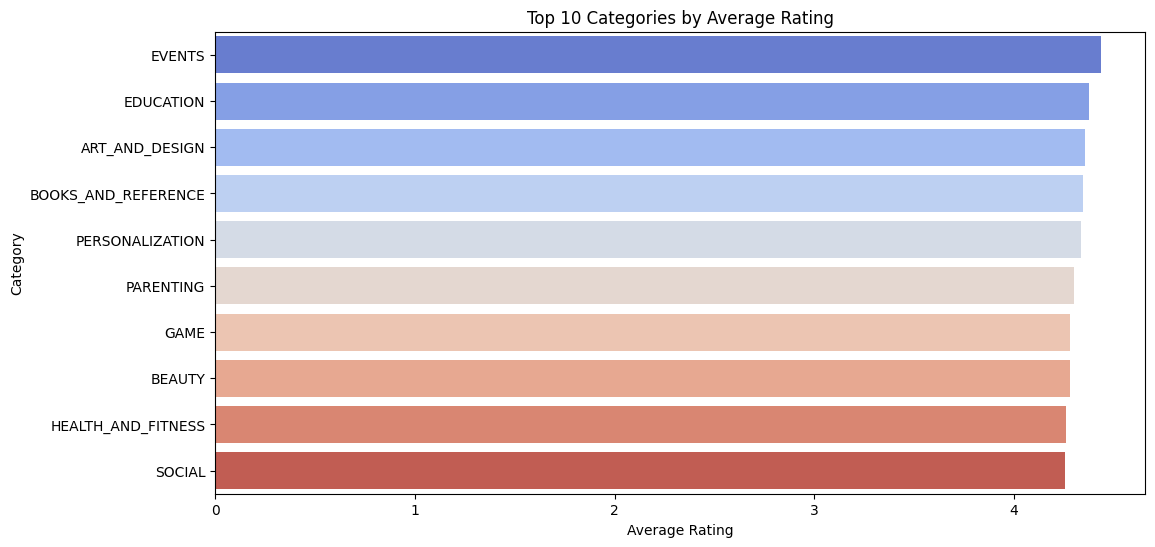

In [11]:
plt.figure(figsize=(12,6))
cat_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=cat_rating.values, y=cat_rating.index, palette='coolwarm')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()


##  Key Takeaways

- Game-related categories are among the most common.
- Most apps have ratings between 3.5 and 4.5.
- Apps with more installs tend to have slightly better ratings.
-  Some categories like **Education** and **Productivity** have higher average ratings.
